<a href="https://colab.research.google.com/github/SABBiR1107/Customer-segmentation-using-clustering/blob/main/Customer_segmentation_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **Load Dataset**

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Understanding**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Data Cleaning**

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


in the dataset there in no null value so no need to cleanind data

# **Selecting Relevent Features**

In [ ]:
X = df[['Age', 'Annual Income (k$)']]

# **Scale The Data**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Determin optimal number of clusters using the elbow method**

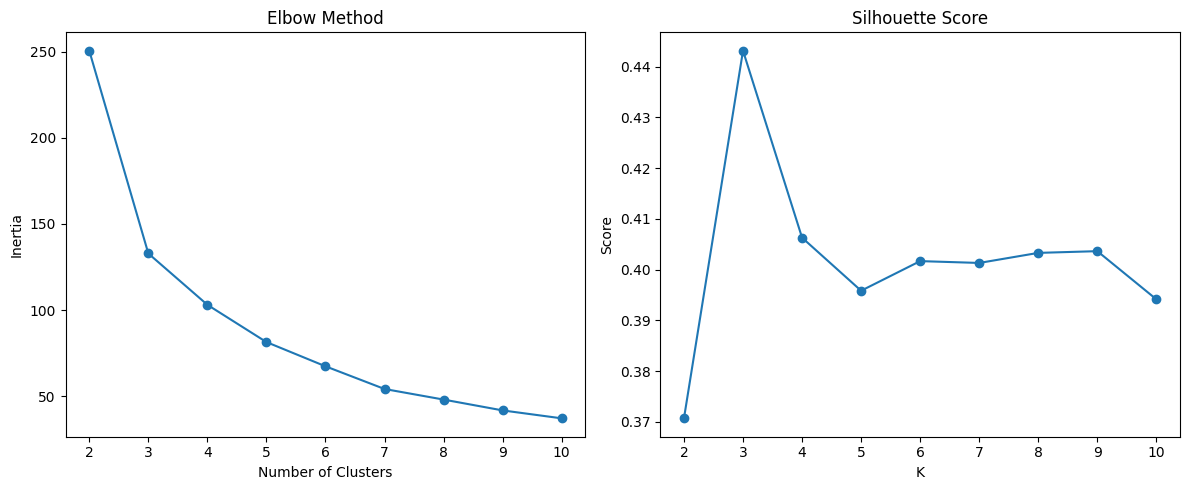

In [ ]:
# ploting Elbow method and silhouette score

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(2,11), inertia, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(range(2,11), sil_score, 'o-')
plt.title('Silhouette Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# **Train final model**

In [ ]:
inertia = []
sil_score = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X_scaled)
  inertia.append(kmeans.inertia_)
  sil_score.append(silhouette_score(X_scaled, labels))



In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=20)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# **Visualize clusters**

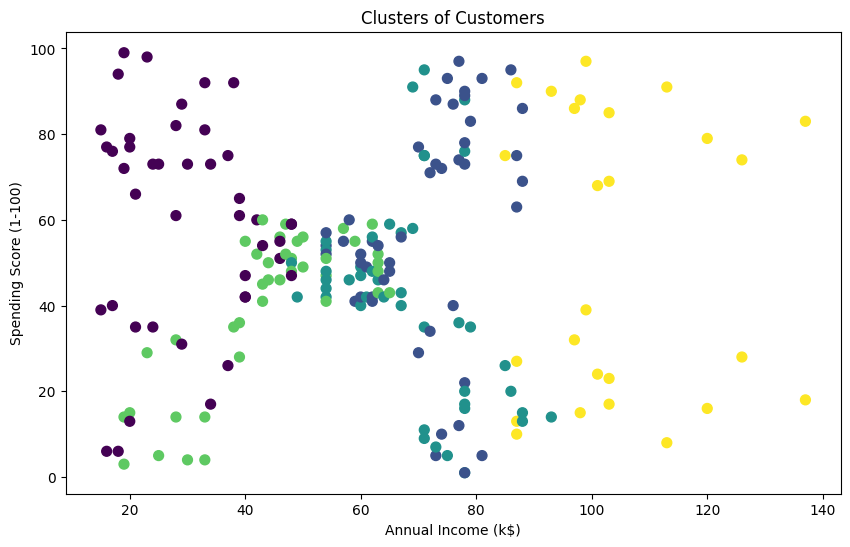

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)


plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **Analyze cluster profiles**

In [ ]:
cluster_summary = df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)
display(cluster_summary)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,27.5,29.7,59.8
1,26.8,71.1,57.2
2,46.0,68.5,41.7
3,58.8,44.0,40.0
4,36.6,104.6,51.8


Based on the cluster summary table, here's an interpretation of each cluster:

*   **Cluster 0:** Younger customers (average age 27.5) with low annual income (average 29.7k) and moderate spending scores (average 59.8). This group could be targeted with promotions on trendy or lower-priced items.
*   **Cluster 1:** Younger customers (average age 26.8) with moderate annual income (average 71.1k) and moderate spending scores (average 57.2). This group might be interested in a variety of products and could be responsive to personalized recommendations.
*   **Cluster 2:** Middle-aged customers (average age 46.0) with moderate annual income (average 68.5k) and lower spending scores (average 41.7). This group may be more price-sensitive or focused on necessities.
*   **Cluster 3:** Older customers (average age 58.8) with lower annual income (average 44.0) and low spending scores (average 40.0). This group may require different marketing approaches, perhaps focusing on value and comfort.
*   **Cluster 4:** Middle-aged customers (average age 36.6) with high annual income (average 104.6k) and moderate spending scores (average 51.8). This group represents high-earning customers who are not necessarily high spenders, suggesting potential for targeted marketing of luxury or premium products.